In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  1 07:47:55 2022

@author: bobbala
"""
import cv2
import os
import numpy as np

## getImagesAndLabels(directory): 
#### input: directory -> root directory of the dataset: in my case it is 'Samples'
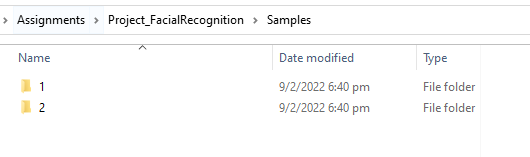
#### output: returns two array 1. face features and face lables
### Description: 
- This function reads each from the specified directory by walking through the 'Samples' directory
* Do the faceDetection() 
- Cropping only face from entire image then append the faces and ids to the return arrays

In [2]:
def getImagesAndLabels(directory):
    features=[]
    labels=[]

    for (path, dir, filenames) in os.walk(directory):

        for filename in filenames:
            id=os.path.basename(path) #fetching subdirectory names
            img_path=os.path.join(path,filename)#fetching image path

            if filename.startswith("."):
                print("Skipping system file")#Skipping files that startwith .
                continue

            img = cv2.imread(img_path) # Read each image one by one
            if img is None:
                print("image not captured properly")
                continue

            faces_rect, gray_img = faceDetection(img)

            print("img_path:",img_path)
            print("id:",id)

           # img = drawRectangle(faces_rect, img)

            (x,y,w,h)=faces_rect[0]
            put_text(img, str([id]),x,y)
            roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from grayscale image
            features.append(roi_gray)
            labels.append(int(id))

    return features,labels

## faceDetection(image)
#### input: taking image as input 
#### output: returns gray image and faces returned from 'MultiScale()

Description: converts input image into gray image as 'CascadeClassifier' works better on gray 
images. 
- using detectMultiScale(gray_img,1.3,5) detects faces. This function takes 3 input parameters 
    - gray image: on which it will detect faces 
    - scaling factor: specifies how much the image size is reduced at each image scale (for better results use 1.3)
    - minNeighbors: How many neighbors each rectangle should have (for better results use 5) 

In [3]:
def faceDetection(tmp_img):
    gray_img=cv2.cvtColor(tmp_img,cv2.COLOR_BGR2GRAY)#convert color image to grayscale
    face_haar_cascade=cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')#Load haar classifier

    faces=face_haar_cascade.detectMultiScale(gray_img,1.3,5)#detectMultiScale returns rectangles
    print("face detected:",faces)
    return faces,gray_img

## drawRectangle(faces, img)
#### input: faces and image
#### output: image 
### Description: This function takes faces and image as input and draw rectangle box over the image


In [5]:
def drawRectangle(faces, img):
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
       # cv2.imshow("Image", img)
       # cv2.waitKey(10)
        return img

## put_text(img, text, x, y) 
#### input: image, text, x, y 
#### output: None 

### Description: This function writes a text message over the image at specified co-ordinates. this function takes 3 arguments 1. image on which we want to write text 2. The text to put on image and co-ordinates of x and y 
 - Function cv2.putText take the following arguments 
     - image: on which we want to write text message.
     - text: text message you want to write. 
     - x,y: co-ordiantes at which location we want to write text 
     - font: font type 
     - fontScale: scale of font 
     - color: color of the text 
     - thicknes: line thicknes and text message thickness

In [6]:
#FONT_HERSHEY_DUPLEX
def put_text(img, text, x, y):
    font = cv2.FONT_HERSHEY_COMPLEX 
    fontScale = 1
    color = (255,0,0)
    thickness = 2
    cv2.putText(img,text, (x,y),font, fontScale,color,thickness)
    #cv2.putText(img, text, org, fontFace, fontScale, color)



Model Trained Sucessfully


## Here first creating an object of LBPHF. Using thie object call 'train' method which takes two arrays (faces, faceIds) as inputs.

In [4]:
def train_classifier(faces,faceID):
    face_recognizer=cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(faces,np.array(faceID))
    face_recognizer.write('trainingData.yml')
    return face_recognizer

In [ ]:
# faces,faceID = getImagesAndLabels('Samples')
# cv2.destroyAllWindows()
# face_recognizer = train_classifier(faces,faceID)

# # save the training data in yml file
# face_recognizer.write('trainingData.yml')

print("Model Trained Sucessfully")